In [16]:
set.seed(1984)
library(tidyverse)
library(tidymodels)

In [36]:
churn_data <- read_csv("Churn_Data.csv")
churn_data

Parsed with column specification:
cols(
  .default = col_character(),
  SeniorCitizen = col_double(),
  tenure = col_double(),
  MonthlyCharges = col_double(),
  TotalCharges = col_double()
)

See spec(...) for full column specifications.



customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,⋯,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,⋯,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,⋯,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,⋯,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,⋯,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,⋯,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,⋯,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,⋯,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes


In [18]:
#Changing categorial variables from characters/dbl to factors

#churn_data <- churn_data %>%
 #   mutate(across(gender:Dependents, as.factor))%>%
  #  mutate(across(PhoneService:PaymentMethod, as.factor))
#churn_data
           
    

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,⋯,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<chr>
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,⋯,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,⋯,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,⋯,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,⋯,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,⋯,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,⋯,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,⋯,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes


In [46]:
churn_wrangle_1 <- churn_data %>%
    select(SeniorCitizen,tenure,Contract, PaymentMethod, PhoneService, InternetService, Churn) %>%
    mutate(Contract=replace(Contract, Contract=="Month-to-month", 1)) %>%
    mutate(Contract=replace(Contract, Contract=="One year", 2)) %>%
    mutate(Contract=replace(Contract, Contract=="Two year", 3)) %>%
    mutate(PaymentMethod=replace(PaymentMethod, PaymentMethod=="Electronic check", 1)) %>%
    mutate(PaymentMethod=replace(PaymentMethod, PaymentMethod=="Mailed check", 2)) %>%
    mutate(PaymentMethod=replace(PaymentMethod, PaymentMethod=="Credit card (automatic)", 3)) %>%
    mutate(PaymentMethod=replace(PaymentMethod, PaymentMethod=="Bank transfer (automatic)", 4)) %>%
    mutate(PhoneService=replace(PhoneService, PhoneService=="No", 0)) %>%
    mutate(PhoneService=replace(PhoneService, PhoneService=="Yes", 2)) %>%
    mutate(InternetService=replace(InternetService, InternetService=="DSL", 1)) %>%
    mutate(InternetService=replace(InternetService, InternetService=="Fiber optic", 2)) %>%
    mutate(InternetService=replace(InternetService, InternetService=="No", 0)) 

churn_wrangle_1

SeniorCitizen,tenure,Contract,PaymentMethod,PhoneService,InternetService,Churn
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
0,1,1,1,0,1,No
0,34,2,2,2,1,No
0,2,1,2,2,1,Yes
0,45,2,4,0,1,No
0,2,1,1,2,2,Yes
0,8,1,1,2,2,Yes
0,22,1,3,2,2,No
0,10,1,2,0,1,No
0,28,1,1,2,2,Yes


In [47]:
churn_cleaned <- churn_wrangle_1 %>%
    mutate(Churn=as.factor(Churn))%>%
    mutate(across(Contract:InternetService, as.numeric))
churn_cleaned

SeniorCitizen,tenure,Contract,PaymentMethod,PhoneService,InternetService,Churn
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,1,1,1,0,1,No
0,34,2,2,2,1,No
0,2,1,2,2,1,Yes
0,45,2,4,0,1,No
0,2,1,1,2,2,Yes
0,8,1,1,2,2,Yes
0,22,1,3,2,2,No
0,10,1,2,0,1,No
0,28,1,1,2,2,Yes


In [48]:
churn_split <- initial_split(churn_cleaned, prop=0.75, strata=Churn)
churn_train <- training(churn_split)
churn_test <- testing(churn_split)

In [43]:
contract_type_payment <- churn_data %>%
    group_by(Contract,PaymentMethod)%>%
    summarize(count=n())
contract_type_payment

`summarise()` regrouping output by 'Contract' (override with `.groups` argument)



Contract,PaymentMethod,count
<chr>,<chr>,<int>
Month-to-month,Bank transfer (automatic),589
Month-to-month,Credit card (automatic),543
Month-to-month,Electronic check,1850
Month-to-month,Mailed check,893
One year,Bank transfer (automatic),391
One year,Credit card (automatic),398
One year,Electronic check,347
One year,Mailed check,337
Two year,Bank transfer (automatic),564


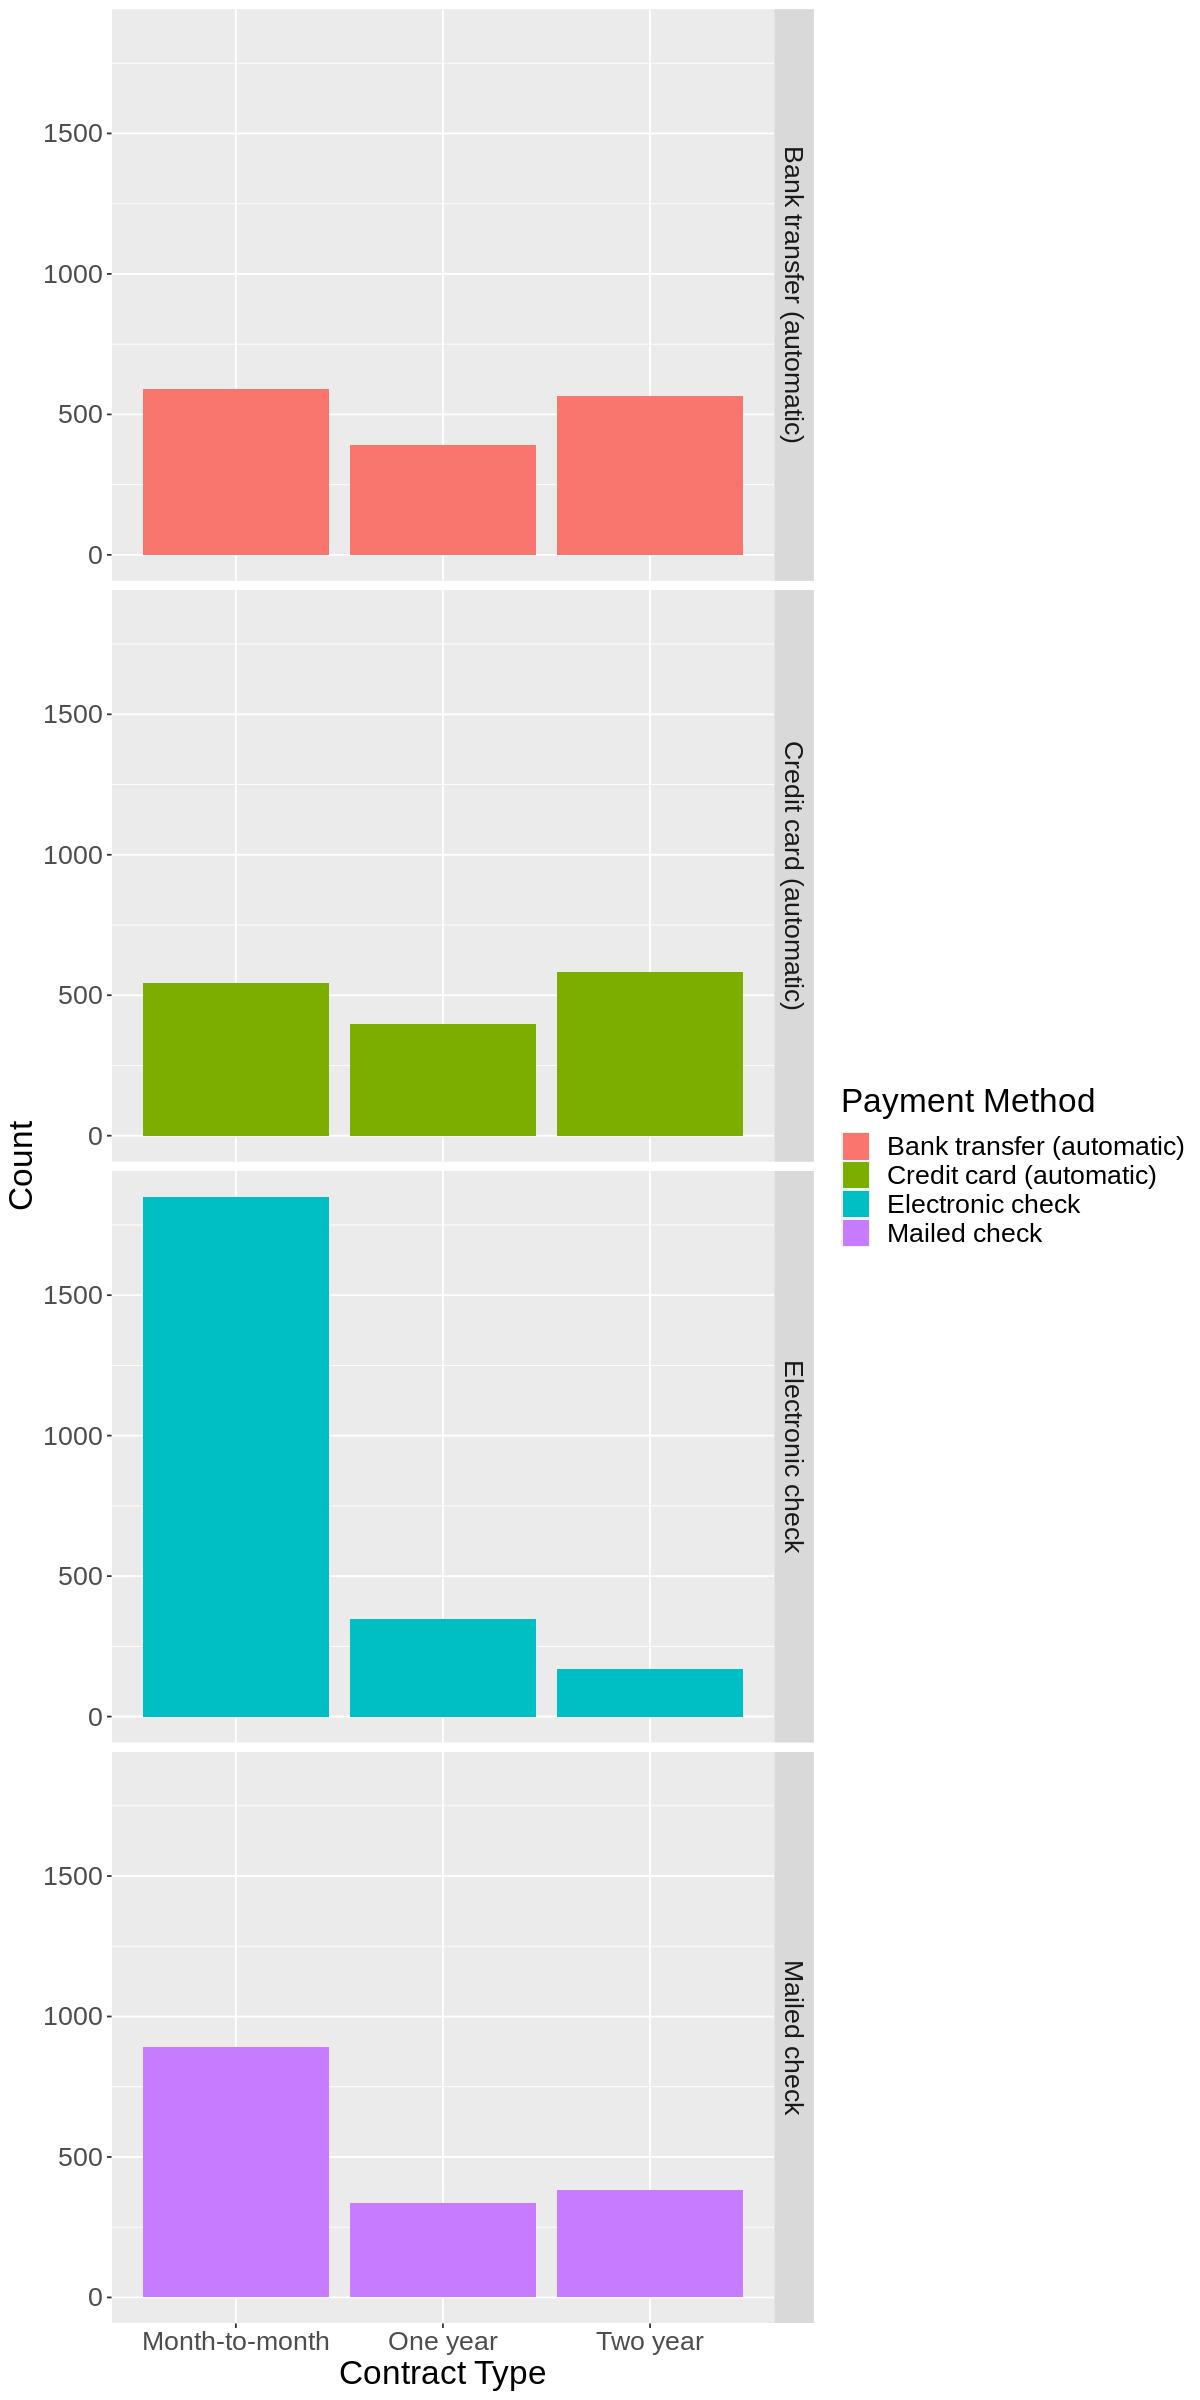

In [44]:
options(repr.plot.width = 10, repr.plot.height = 20)

contract_type_payment_grid <- contract_type_payment %>%
    ggplot(aes(x=Contract,y=count,fill=PaymentMethod))+
    geom_bar(stat="identity")+
    facet_grid(PaymentMethod ~ .)+
    labs(x="Contract Type", y="Count", fill="Payment Method")+
    theme(text=element_text(size=20))
contract_type_payment_grid

In [ ]:
k_vals <- tibble(neighbors = seq(from = 1, to =50, by = 1))

churn_vfold <- vfold_cv(churn_train, v=5, strata=Churn)

churn_recipe <- recipe(Churn ~ ., data=churn_train)%>%
    step_scale(all_predictors())%>%
    step_center(all_predictors())

churn_spec <- nearest_neighbor(weight_func="rectangular", neighbors=tune())%>%
    set_engine("kknn")%>%
    set_mode("classification")

churn_results <- workflow() %>%
    add_recipe(churn_recipe)%>%
    add_model(churn_spec)%>%
    tune_grid(resamples=churn_vfold, grid=k_vals) %>%
    collect_metrics()


In [ ]:
accuracies <- churn_results %>%
    filter(.metric=="accuracy")

k_accuracy <- accuracies %>%
    ggplot(aes(x=neighbors,y=mean))+
    geom_point()+
    geom_line()+
    labs(x="Neighbors", y="Accuracy Estimate")
k_accuracy